In [2]:
%matplotlib notebook

In [3]:
import pandas as pd
from census import Census
import censusdata
import requests
import json
import matplotlib.pyplot as plt
import numpy as np

#Census API Key
from config import api_key
c = Census(api_key, year=2017)



In [4]:
sdf = pd.read_csv("../Resources/source_data.csv")
sdf = sdf[["Name","Latitude","Longitude","Street1","Street2","Street3","City","CountrySubdivisionCode"]]
sdf

,Name,Latitude,Longitude,Street1,Street2,Street3,City,CountrySubdivisionCode
0,Galloway,39.46,-74.49,405 S. Pitney Road,NaN,Galloway Village Square Shopping Center,Absecon,NJ
1,Acme - Allendale #1095,41.03,-74.13,45 Demercurio Dr,NaN,NaN,Allendale,NJ
2,Target Ocean T-1378,40.23,-74.05,2331 State Route 66,NaN,NaN,Asbury Park,NJ
3,"Atlantic City, The Walk",39.36,-74.44,120 North Michigan Avenue,NaN,NaN,Atlantic City,NJ
4,Golden Nugget-Atlantic City,39.38,-74.43,1 Castle Blvd,NaN,NaN,Atlantic City,NJ
5,Tropicana Marketplace,39.35,-74.45,2831 Boardwalk,NaN,NaN,Atlantic City,NJ
6,Trump Taj Mahal-Atlantic City-Main,39.36,-74.42,1000 Boardwalk at Virginia Ave,NaN,NaN,Atlantic City,NJ
7,Acme - Barnegat #7921,39.76,-74.25,912 W Bay Ave,NaN,NaN,Barnegat,NJ
8,Bernards-Riverwalk,40.65,-74.58,655 Martinsville Road,NaN,NaN,Bernards,NJ
9,Stop & Shop - Bayonne #853,40.67,-74.11,1 Lefante Way,NaN,NaN,Bayonne,NJ


In [8]:
import pandas as pd
import censusdata
mydata = censusdata.download('acs5', 2017,
                            censusdata.censusgeo([('state','34'), ('county', '*'),
                            ('county subdivision','*')]),
                            ['B19013_001E', 'B01003_001E', 'B01001_002E',
                             'B01001A_001E', 'B01001B_001E', 'B01001D_001E', 'B01001I_001E',
                             'B23025_004E', 'B01002A_001E', 'B09001_001E',
                             'B08136_001E'])

In [9]:
mydata['city'] = mydata.index
mydata = mydata.reset_index()

cities = []
clean = []
length = len(mydata['city'])
for i in range (0,length):
    cities.append(str(mydata['city'].tolist()[i]).split(',')[0])
for i in cities:
    end = (len(i.split(' ')))
    i = (i.split(' ')[:end-1])
    clean.append(" ".join(i))
    
df = pd.DataFrame({"City": [],"Income":[],"Population":[], "Male Pop (%)":[],
                   "White (%)":[],"Black (%)":[],"Asian (%)":[],"Hispanic (%)":[],
                   "Employed (%)":[], "Travel Time to Work (mins)":[],
                  "Median Age":[], "Age <18 (%)":[]})
df['City'] = clean
df['Income'] = mydata["B19013_001E"]
df['Population'] = mydata['B01003_001E']
df['Male Pop (%)'] = ((mydata['B01001_002E'])/(mydata['B01003_001E'])*100).round(2)
df["White (%)"] = ((mydata['B01001A_001E'])/(mydata['B01003_001E'])*100).round(2)
df["Black (%)"] = ((mydata['B01001B_001E'])/(mydata['B01003_001E'])*100).round(2)
df["Asian (%)"] = ((mydata['B01001D_001E'])/(mydata['B01003_001E'])*100).round(2)
df["Hispanic (%)"] = ((mydata['B01001I_001E'])/(mydata['B01003_001E'])*100).round(2)
df["Employed (%)"] = ((mydata['B23025_004E'])/(mydata['B01003_001E'])*100).round(2)
df['Median Age'] = mydata['B01002A_001E']
df['Age <18 (%)'] = ((mydata['B09001_001E'])/(mydata['B01003_001E'])*100).round(2)
df["Travel Time to Work (mins)"] = ((mydata['B08136_001E'])/(mydata['B23025_004E'])).round(0)

df.head()

,City,Income,Population,Male Pop (%),White (%),Black (%),Asian (%),Hispanic (%),Employed (%),Travel Time to Work (mins),Median Age,Age <18 (%)
0,West Windsor,175684,28289,48.03,47.79,2.69,46.65,3.02,50.71,40.0,45.3,26.15
1,East Windsor,85636,27675,47.43,65.92,8.14,19.72,23.17,49.61,31.0,39.0,24.07
2,Hopewell,113125,1976,46.96,93.12,1.16,3.95,3.19,55.36,NaN,43.6,24.75
3,Hightstown,72973,5527,48.45,75.72,6.66,4.67,36.11,53.48,NaN,39.0,19.63
4,Hopewell,129320,18503,50.40,83.99,5.53,6.63,5.38,50.01,NaN,47.3,21.87


In [10]:
df.to_csv("../Resources/census_data.csv")

In [11]:
merged = pd.merge(sdf, df, how='left', on='City')

In [12]:
merged

,Name,Latitude,Longitude,Street1,Street2,Street3,City,CountrySubdivisionCode,Income,Population,Male Pop (%),White (%),Black (%),Asian (%),Hispanic (%),Employed (%),Travel Time to Work (mins),Median Age,Age <18 (%)
0,Galloway,39.46,-74.49,405 S. Pitney Road,NaN,Galloway Village Square Shopping Center,Absecon,NJ,63887.0,8370.0,47.93,79.86,8.69,6.38,7.42,46.31,NaN,51.2,19.39
1,Acme - Allendale #1095,41.03,-74.13,45 Demercurio Dr,NaN,NaN,Allendale,NJ,151875.0,6820.0,47.90,85.12,1.09,11.74,1.80,45.72,NaN,47.8,28.04
2,Target Ocean T-1378,40.23,-74.05,2331 State Route 66,NaN,NaN,Asbury Park,NJ,39324.0,15830.0,49.20,37.25,46.78,0.66,30.16,47.87,24.0,40.6,23.83
3,"Atlantic City, The Walk",39.36,-74.44,120 North Michigan Avenue,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,31.97,36.24,18.23,29.27,39.01,NaN,41.7,25.21
4,Golden Nugget-Atlantic City,39.38,-74.43,1 Castle Blvd,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,31.97,36.24,18.23,29.27,39.01,NaN,41.7,25.21
5,Tropicana Marketplace,39.35,-74.45,2831 Boardwalk,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,31.97,36.24,18.23,29.27,39.01,NaN,41.7,25.21
6,Trump Taj Mahal-Atlantic City-Main,39.36,-74.42,1000 Boardwalk at Virginia Ave,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,31.97,36.24,18.23,29.27,39.01,NaN,41.7,25.21
7,Acme - Barnegat #7921,39.76,-74.25,912 W Bay Ave,NaN,NaN,Barnegat,NJ,69877.0,22141.0,46.81,88.18,7.15,0.50,8.68,41.62,NaN,48.9,21.07
8,Bernards-Riverwalk,40.65,-74.58,655 Martinsville Road,NaN,NaN,Bernards,NJ,137855.0,27032.0,48.23,75.48,2.34,19.19,5.42,46.81,NaN,45.9,27.19
9,Stop & Shop - Bayonne #853,40.67,-74.11,1 Lefante Way,NaN,NaN,Bayonne,NJ,56701.0,66719.0,49.61,65.70,11.11,8.97,29.60,46.70,34.0,43.2,22.26


In [13]:
merged.to_csv("../Resources/final_merged_data.csv")

In [14]:
starbucks_final =merged.drop_duplicates(subset="Street1", keep='first', inplace=False)
starbucks_final =starbucks_final.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
starbucks_final

,index,Name,Latitude,Longitude,Street1,Street2,Street3,City,CountrySubdivisionCode,Income,Population,Male Pop (%),White (%),Black (%),Asian (%),Hispanic (%),Employed (%),Travel Time to Work (mins),Median Age,Age <18 (%)
0,0,Galloway,39.46,-74.49,405 S. Pitney Road,NaN,Galloway Village Square Shopping Center,Absecon,NJ,63887.0,8370.0,47.93,79.86,8.69,6.38,7.42,46.31,NaN,51.2,19.39
1,1,Acme - Allendale #1095,41.03,-74.13,45 Demercurio Dr,NaN,NaN,Allendale,NJ,151875.0,6820.0,47.90,85.12,1.09,11.74,1.80,45.72,NaN,47.8,28.04
2,2,Target Ocean T-1378,40.23,-74.05,2331 State Route 66,NaN,NaN,Asbury Park,NJ,39324.0,15830.0,49.20,37.25,46.78,0.66,30.16,47.87,24.0,40.6,23.83
3,3,"Atlantic City, The Walk",39.36,-74.44,120 North Michigan Avenue,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,31.97,36.24,18.23,29.27,39.01,NaN,41.7,25.21
4,4,Golden Nugget-Atlantic City,39.38,-74.43,1 Castle Blvd,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,31.97,36.24,18.23,29.27,39.01,NaN,41.7,25.21
5,5,Tropicana Marketplace,39.35,-74.45,2831 Boardwalk,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,31.97,36.24,18.23,29.27,39.01,NaN,41.7,25.21
6,6,Trump Taj Mahal-Atlantic City-Main,39.36,-74.42,1000 Boardwalk at Virginia Ave,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,31.97,36.24,18.23,29.27,39.01,NaN,41.7,25.21
7,7,Acme - Barnegat #7921,39.76,-74.25,912 W Bay Ave,NaN,NaN,Barnegat,NJ,69877.0,22141.0,46.81,88.18,7.15,0.50,8.68,41.62,NaN,48.9,21.07
8,8,Bernards-Riverwalk,40.65,-74.58,655 Martinsville Road,NaN,NaN,Bernards,NJ,137855.0,27032.0,48.23,75.48,2.34,19.19,5.42,46.81,NaN,45.9,27.19
9,9,Stop & Shop - Bayonne #853,40.67,-74.11,1 Lefante Way,NaN,NaN,Bayonne,NJ,56701.0,66719.0,49.61,65.70,11.11,8.97,29.60,46.70,34.0,43.2,22.26


In [15]:
#Google Maps/Places API section

from config import gkey


In [16]:
starbucks_final['lat-API'] = ""
starbucks_final['long-API'] = ""
starbucks_final['target search add'] = ""

starbucks_final.head()

,index,Name,Latitude,Longitude,Street1,Street2,Street3,City,CountrySubdivisionCode,Income,...,Black (%),Asian (%),Hispanic (%),Employed (%),Travel Time to Work (mins),Median Age,Age <18 (%),lat-API,long-API,target search add
0,0,Galloway,39.46,-74.49,405 S. Pitney Road,NaN,Galloway Village Square Shopping Center,Absecon,NJ,63887.0,...,8.69,6.38,7.42,46.31,NaN,51.2,19.39,,,
1,1,Acme - Allendale #1095,41.03,-74.13,45 Demercurio Dr,NaN,NaN,Allendale,NJ,151875.0,...,1.09,11.74,1.80,45.72,NaN,47.8,28.04,,,
2,2,Target Ocean T-1378,40.23,-74.05,2331 State Route 66,NaN,NaN,Asbury Park,NJ,39324.0,...,46.78,0.66,30.16,47.87,24.0,40.6,23.83,,,
3,3,"Atlantic City, The Walk",39.36,-74.44,120 North Michigan Avenue,NaN,NaN,Atlantic City,NJ,26006.0,...,36.24,18.23,29.27,39.01,NaN,41.7,25.21,,,
4,4,Golden Nugget-Atlantic City,39.38,-74.43,1 Castle Blvd,NaN,NaN,Atlantic City,NJ,26006.0,...,36.24,18.23,29.27,39.01,NaN,41.7,25.21,,,


In [17]:
# use iterrows to iterate through pandas dataframe
for index, row in starbucks_final.iterrows():
    starbucks_final['target search add'] = starbucks_final['Street1'] + "," + starbucks_final['City'] + "," + starbucks_final['CountrySubdivisionCode']
    
starbucks_final

,index,Name,Latitude,Longitude,Street1,Street2,Street3,City,CountrySubdivisionCode,Income,...,Black (%),Asian (%),Hispanic (%),Employed (%),Travel Time to Work (mins),Median Age,Age <18 (%),lat-API,long-API,target search add
0,0,Galloway,39.46,-74.49,405 S. Pitney Road,NaN,Galloway Village Square Shopping Center,Absecon,NJ,63887.0,...,8.69,6.38,7.42,46.31,NaN,51.2,19.39,,,"405 S. Pitney Road,Absecon,NJ"
1,1,Acme - Allendale #1095,41.03,-74.13,45 Demercurio Dr,NaN,NaN,Allendale,NJ,151875.0,...,1.09,11.74,1.80,45.72,NaN,47.8,28.04,,,"45 Demercurio Dr,Allendale,NJ"
2,2,Target Ocean T-1378,40.23,-74.05,2331 State Route 66,NaN,NaN,Asbury Park,NJ,39324.0,...,46.78,0.66,30.16,47.87,24.0,40.6,23.83,,,"2331 State Route 66,Asbury Park,NJ"
3,3,"Atlantic City, The Walk",39.36,-74.44,120 North Michigan Avenue,NaN,NaN,Atlantic City,NJ,26006.0,...,36.24,18.23,29.27,39.01,NaN,41.7,25.21,,,"120 North Michigan Avenue,Atlantic City,NJ"
4,4,Golden Nugget-Atlantic City,39.38,-74.43,1 Castle Blvd,NaN,NaN,Atlantic City,NJ,26006.0,...,36.24,18.23,29.27,39.01,NaN,41.7,25.21,,,"1 Castle Blvd,Atlantic City,NJ"
5,5,Tropicana Marketplace,39.35,-74.45,2831 Boardwalk,NaN,NaN,Atlantic City,NJ,26006.0,...,36.24,18.23,29.27,39.01,NaN,41.7,25.21,,,"2831 Boardwalk,Atlantic City,NJ"
6,6,Trump Taj Mahal-Atlantic City-Main,39.36,-74.42,1000 Boardwalk at Virginia Ave,NaN,NaN,Atlantic City,NJ,26006.0,...,36.24,18.23,29.27,39.01,NaN,41.7,25.21,,,"1000 Boardwalk at Virginia Ave,Atlantic City,NJ"
7,7,Acme - Barnegat #7921,39.76,-74.25,912 W Bay Ave,NaN,NaN,Barnegat,NJ,69877.0,...,7.15,0.50,8.68,41.62,NaN,48.9,21.07,,,"912 W Bay Ave,Barnegat,NJ"
8,8,Bernards-Riverwalk,40.65,-74.58,655 Martinsville Road,NaN,NaN,Bernards,NJ,137855.0,...,2.34,19.19,5.42,46.81,NaN,45.9,27.19,,,"655 Martinsville Road,Bernards,NJ"
9,9,Stop & Shop - Bayonne #853,40.67,-74.11,1 Lefante Way,NaN,NaN,Bayonne,NJ,56701.0,...,11.11,8.97,29.60,46.70,34.0,43.2,22.26,,,"1 Lefante Way,Bayonne,NJ"


In [18]:

# use iterrows to iterate through pandas dataframe
for index, row in starbucks_final.iterrows():
    
    try:

        # Target address
        target_address = row['target search add']

        # Build the endpoint URL
        target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
        'address={0}&key={1}').format(target_address, gkey)

        geo_data = requests.get(target_url).json()
        lat = geo_data["results"][0]["geometry"]["location"]["lat"]
        lng = geo_data["results"][0]["geometry"]["location"]["lng"]

        starbucks_final.loc[index, 'lat-API'] = lat
        starbucks_final.loc[index, 'long-API'] = lng
    except: 
        print("error " + str(index))
        



error 18


In [19]:
starbucks_final

,index,Name,Latitude,Longitude,Street1,Street2,Street3,City,CountrySubdivisionCode,Income,...,Black (%),Asian (%),Hispanic (%),Employed (%),Travel Time to Work (mins),Median Age,Age <18 (%),lat-API,long-API,target search add
0,0,Galloway,39.46,-74.49,405 S. Pitney Road,NaN,Galloway Village Square Shopping Center,Absecon,NJ,63887.0,...,8.69,6.38,7.42,46.31,NaN,51.2,19.39,39.4622,-74.4947,"405 S. Pitney Road,Absecon,NJ"
1,1,Acme - Allendale #1095,41.03,-74.13,45 Demercurio Dr,NaN,NaN,Allendale,NJ,151875.0,...,1.09,11.74,1.80,45.72,NaN,47.8,28.04,41.029,-74.1281,"45 Demercurio Dr,Allendale,NJ"
2,2,Target Ocean T-1378,40.23,-74.05,2331 State Route 66,NaN,NaN,Asbury Park,NJ,39324.0,...,46.78,0.66,30.16,47.87,24.0,40.6,23.83,40.2313,-74.0451,"2331 State Route 66,Asbury Park,NJ"
3,3,"Atlantic City, The Walk",39.36,-74.44,120 North Michigan Avenue,NaN,NaN,Atlantic City,NJ,26006.0,...,36.24,18.23,29.27,39.01,NaN,41.7,25.21,39.3608,-74.437,"120 North Michigan Avenue,Atlantic City,NJ"
4,4,Golden Nugget-Atlantic City,39.38,-74.43,1 Castle Blvd,NaN,NaN,Atlantic City,NJ,26006.0,...,36.24,18.23,29.27,39.01,NaN,41.7,25.21,39.3785,-74.4291,"1 Castle Blvd,Atlantic City,NJ"
5,5,Tropicana Marketplace,39.35,-74.45,2831 Boardwalk,NaN,NaN,Atlantic City,NJ,26006.0,...,36.24,18.23,29.27,39.01,NaN,41.7,25.21,39.3524,-74.4446,"2831 Boardwalk,Atlantic City,NJ"
6,6,Trump Taj Mahal-Atlantic City-Main,39.36,-74.42,1000 Boardwalk at Virginia Ave,NaN,NaN,Atlantic City,NJ,26006.0,...,36.24,18.23,29.27,39.01,NaN,41.7,25.21,39.36,-74.4212,"1000 Boardwalk at Virginia Ave,Atlantic City,NJ"
7,7,Acme - Barnegat #7921,39.76,-74.25,912 W Bay Ave,NaN,NaN,Barnegat,NJ,69877.0,...,7.15,0.50,8.68,41.62,NaN,48.9,21.07,39.7596,-74.2465,"912 W Bay Ave,Barnegat,NJ"
8,8,Bernards-Riverwalk,40.65,-74.58,655 Martinsville Road,NaN,NaN,Bernards,NJ,137855.0,...,2.34,19.19,5.42,46.81,NaN,45.9,27.19,40.6524,-74.5766,"655 Martinsville Road,Bernards,NJ"
9,9,Stop & Shop - Bayonne #853,40.67,-74.11,1 Lefante Way,NaN,NaN,Bayonne,NJ,56701.0,...,11.11,8.97,29.60,46.70,34.0,43.2,22.26,40.6678,-74.1042,"1 Lefante Way,Bayonne,NJ"


In [20]:
starbucks_final =starbucks_final.drop(columns=['Latitude', 'Longitude'])
starbucks_final

,index,Name,Street1,Street2,Street3,City,CountrySubdivisionCode,Income,Population,Male Pop (%),...,Black (%),Asian (%),Hispanic (%),Employed (%),Travel Time to Work (mins),Median Age,Age <18 (%),lat-API,long-API,target search add
0,0,Galloway,405 S. Pitney Road,NaN,Galloway Village Square Shopping Center,Absecon,NJ,63887.0,8370.0,47.93,...,8.69,6.38,7.42,46.31,NaN,51.2,19.39,39.4622,-74.4947,"405 S. Pitney Road,Absecon,NJ"
1,1,Acme - Allendale #1095,45 Demercurio Dr,NaN,NaN,Allendale,NJ,151875.0,6820.0,47.90,...,1.09,11.74,1.80,45.72,NaN,47.8,28.04,41.029,-74.1281,"45 Demercurio Dr,Allendale,NJ"
2,2,Target Ocean T-1378,2331 State Route 66,NaN,NaN,Asbury Park,NJ,39324.0,15830.0,49.20,...,46.78,0.66,30.16,47.87,24.0,40.6,23.83,40.2313,-74.0451,"2331 State Route 66,Asbury Park,NJ"
3,3,"Atlantic City, The Walk",120 North Michigan Avenue,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,36.24,18.23,29.27,39.01,NaN,41.7,25.21,39.3608,-74.437,"120 North Michigan Avenue,Atlantic City,NJ"
4,4,Golden Nugget-Atlantic City,1 Castle Blvd,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,36.24,18.23,29.27,39.01,NaN,41.7,25.21,39.3785,-74.4291,"1 Castle Blvd,Atlantic City,NJ"
5,5,Tropicana Marketplace,2831 Boardwalk,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,36.24,18.23,29.27,39.01,NaN,41.7,25.21,39.3524,-74.4446,"2831 Boardwalk,Atlantic City,NJ"
6,6,Trump Taj Mahal-Atlantic City-Main,1000 Boardwalk at Virginia Ave,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,36.24,18.23,29.27,39.01,NaN,41.7,25.21,39.36,-74.4212,"1000 Boardwalk at Virginia Ave,Atlantic City,NJ"
7,7,Acme - Barnegat #7921,912 W Bay Ave,NaN,NaN,Barnegat,NJ,69877.0,22141.0,46.81,...,7.15,0.50,8.68,41.62,NaN,48.9,21.07,39.7596,-74.2465,"912 W Bay Ave,Barnegat,NJ"
8,8,Bernards-Riverwalk,655 Martinsville Road,NaN,NaN,Bernards,NJ,137855.0,27032.0,48.23,...,2.34,19.19,5.42,46.81,NaN,45.9,27.19,40.6524,-74.5766,"655 Martinsville Road,Bernards,NJ"
9,9,Stop & Shop - Bayonne #853,1 Lefante Way,NaN,NaN,Bayonne,NJ,56701.0,66719.0,49.61,...,11.11,8.97,29.60,46.70,34.0,43.2,22.26,40.6678,-74.1042,"1 Lefante Way,Bayonne,NJ"


In [21]:

starbucks_final = starbucks_final.rename(columns={"lat-API":"Latitude","long-API":"Longitude"})
starbucks_final.head()

,index,Name,Street1,Street2,Street3,City,CountrySubdivisionCode,Income,Population,Male Pop (%),...,Black (%),Asian (%),Hispanic (%),Employed (%),Travel Time to Work (mins),Median Age,Age <18 (%),Latitude,Longitude,target search add
0,0,Galloway,405 S. Pitney Road,NaN,Galloway Village Square Shopping Center,Absecon,NJ,63887.0,8370.0,47.93,...,8.69,6.38,7.42,46.31,NaN,51.2,19.39,39.4622,-74.4947,"405 S. Pitney Road,Absecon,NJ"
1,1,Acme - Allendale #1095,45 Demercurio Dr,NaN,NaN,Allendale,NJ,151875.0,6820.0,47.90,...,1.09,11.74,1.80,45.72,NaN,47.8,28.04,41.029,-74.1281,"45 Demercurio Dr,Allendale,NJ"
2,2,Target Ocean T-1378,2331 State Route 66,NaN,NaN,Asbury Park,NJ,39324.0,15830.0,49.20,...,46.78,0.66,30.16,47.87,24.0,40.6,23.83,40.2313,-74.0451,"2331 State Route 66,Asbury Park,NJ"
3,3,"Atlantic City, The Walk",120 North Michigan Avenue,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,36.24,18.23,29.27,39.01,NaN,41.7,25.21,39.3608,-74.437,"120 North Michigan Avenue,Atlantic City,NJ"
4,4,Golden Nugget-Atlantic City,1 Castle Blvd,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,36.24,18.23,29.27,39.01,NaN,41.7,25.21,39.3785,-74.4291,"1 Castle Blvd,Atlantic City,NJ"


In [22]:
starbucks_final.to_csv("../Resources/final_data.csv")

In [23]:
analysis_df = pd.DataFrame(starbucks_final['City'].value_counts())
analysis_df['Median Income'] = ""
analysis_df['Population'] = ""
analysis_df['Male Pop (%)'] = ""
analysis_df['White Pop (%)'] = ""
analysis_df['Black Pop (%)'] = ""
analysis_df['Asian Pop (%)'] = ""
analysis_df['Hispanic Pop (%)'] = ""
analysis_df['Employed Pop (%)'] = ""
analysis_df['Median Age'] = ""
analysis_df['Age <18 (%)'] = ""



In [24]:
analysis_df.to_csv("../Resources/analysis_data.csv")
    
    
    

In [25]:
analysis_final = pd.read_csv("../Resources/analysis_data-formatted.csv",index_col=[0])
analysis_final.head()

,City,Median Income,Population,Male Pop (%),White Pop (%),Black Pop (%),Asian Pop (%),Hispanic Pop (%),Employed Pop (%),Median Age,Age <18 (%)
Cherry Hill,8,"97,069","71,204",48.90,73.88,6.65,13.46,7.03,51.85,45.6,22.08
Paramus,6,"105,114","26,919",49.34,65.63,3.17,28.29,9.45,45.76,50.5,19.46
Wayne,6,"108,092","55,154",47.17,87.06,1.79,8.20,12.06,49.6,44.5,20.51
Edison,5,"95,622","102,304",48.83,36.35,7.13,49.02,9.58,50.14,50.2,22.24
Fort Lee,5,"76,578","37,058",45.83,50.46,2.59,41.42,13.10,48.41,54.4,16.98


In [26]:
analysis_final = analysis_final.rename(columns={"City":"# of Starbucks"})

analysis_final = analysis_final.rename_axis('City')

analysis_final

,# of Starbucks,Median Income,Population,Male Pop (%),White Pop (%),Black Pop (%),Asian Pop (%),Hispanic Pop (%),Employed Pop (%),Median Age,Age <18 (%)
City,,,,,,,,,,,
Cherry Hill,8,"97,069","71,204",48.90,73.88,6.65,13.46,7.03,51.85,45.6,22.08
Paramus,6,"105,114","26,919",49.34,65.63,3.17,28.29,9.45,45.76,50.5,19.46
Wayne,6,"108,092","55,154",47.17,87.06,1.79,8.20,12.06,49.6,44.5,20.51
Edison,5,"95,622","102,304",48.83,36.35,7.13,49.02,9.58,50.14,50.2,22.24
Fort Lee,5,"76,578","37,058",45.83,50.46,2.59,41.42,13.10,48.41,54.4,16.98
Jersey City,5,"62,739","265,932",49.21,35.41,23.99,25.39,28.82,51.07,36.8,20.87
Lawrence,4,"96,529","33,288",47.20,68.99,11.82,15.66,8.58,52.03,41.5,19.18
Atlantic City,4,"26,006","39,075",49.58,31.97,36.24,18.23,29.27,39.01,41.7,25.21
Woodbridge,4,"83,266","101,639",51.15,56.96,11.54,24.58,18.87,49.69,45.3,20.43


In [27]:
#This describes the characteristics of ALL the cities which contain atleast 1 Starbucks in NJ (151 cities)
analysis_final.describe()

,# of Starbucks,Male Pop (%),White Pop (%),Black Pop (%),Asian Pop (%),Hispanic Pop (%),Median Age,Age <18 (%)
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.635762,48.725166,75.427815,8.613576,9.825298,14.102119,43.858278,22.023576
std,1.180302,1.869239,16.627419,11.121767,9.424473,12.980562,5.360850,4.149777
min,1.000000,44.310000,21.220000,0.000000,0.000000,0.000000,19.300000,9.050000
25%,1.000000,47.635000,68.245000,2.060000,3.015000,6.750000,41.800000,20.135000
50%,1.000000,48.650000,79.720000,3.860000,7.020000,9.850000,44.100000,21.550000
75%,2.000000,49.595000,87.610000,10.525000,13.220000,16.110000,46.300000,23.775000
max,8.000000,56.520000,99.770000,50.480000,49.020000,76.950000,61.300000,46.970000


In [28]:
#This describes the characteristics of the top 20 cities which account for about 34% of all Starbucks locations in NJ
top20_df = analysis_final.head(20)
top20_df


,# of Starbucks,Median Income,Population,Male Pop (%),White Pop (%),Black Pop (%),Asian Pop (%),Hispanic Pop (%),Employed Pop (%),Median Age,Age <18 (%)
City,,,,,,,,,,,
Cherry Hill,8,"97,069","71,204",48.90,73.88,6.65,13.46,7.03,51.85,45.6,22.08
Paramus,6,"105,114","26,919",49.34,65.63,3.17,28.29,9.45,45.76,50.5,19.46
Wayne,6,"108,092","55,154",47.17,87.06,1.79,8.20,12.06,49.6,44.5,20.51
Edison,5,"95,622","102,304",48.83,36.35,7.13,49.02,9.58,50.14,50.2,22.24
Fort Lee,5,"76,578","37,058",45.83,50.46,2.59,41.42,13.10,48.41,54.4,16.98
Jersey City,5,"62,739","265,932",49.21,35.41,23.99,25.39,28.82,51.07,36.8,20.87
Lawrence,4,"96,529","33,288",47.20,68.99,11.82,15.66,8.58,52.03,41.5,19.18
Atlantic City,4,"26,006","39,075",49.58,31.97,36.24,18.23,29.27,39.01,41.7,25.21
Woodbridge,4,"83,266","101,639",51.15,56.96,11.54,24.58,18.87,49.69,45.3,20.43


In [29]:
top20_df.describe()

,# of Starbucks,Male Pop (%),White Pop (%),Black Pop (%),Asian Pop (%),Hispanic Pop (%),Median Age,Age <18 (%)
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,4.150000,48.723000,63.992500,12.423500,16.769500,14.029500,43.635000,20.541000
std,1.348488,1.280584,21.957375,13.236969,13.995273,8.393636,5.657531,2.718095
min,3.000000,45.830000,25.290000,1.790000,0.720000,4.440000,31.800000,13.550000
25%,3.000000,48.142500,45.867500,3.192500,7.105000,8.820000,41.650000,19.390000
50%,4.000000,48.665000,69.870000,6.890000,11.935000,11.645000,44.950000,20.805000
75%,5.000000,49.452500,82.992500,13.825000,24.782500,16.250000,46.025000,22.095000
max,8.000000,51.150000,94.040000,50.120000,49.020000,36.380000,54.400000,25.210000


In [30]:
starbucks_final['Cafe within 1 mile'] = ""
starbucks_final


,index,Name,Street1,Street2,Street3,City,CountrySubdivisionCode,Income,Population,Male Pop (%),...,Asian (%),Hispanic (%),Employed (%),Travel Time to Work (mins),Median Age,Age <18 (%),Latitude,Longitude,target search add,Cafe within 1 mile
0,0,Galloway,405 S. Pitney Road,NaN,Galloway Village Square Shopping Center,Absecon,NJ,63887.0,8370.0,47.93,...,6.38,7.42,46.31,NaN,51.2,19.39,39.4622,-74.4947,"405 S. Pitney Road,Absecon,NJ",
1,1,Acme - Allendale #1095,45 Demercurio Dr,NaN,NaN,Allendale,NJ,151875.0,6820.0,47.90,...,11.74,1.80,45.72,NaN,47.8,28.04,41.029,-74.1281,"45 Demercurio Dr,Allendale,NJ",
2,2,Target Ocean T-1378,2331 State Route 66,NaN,NaN,Asbury Park,NJ,39324.0,15830.0,49.20,...,0.66,30.16,47.87,24.0,40.6,23.83,40.2313,-74.0451,"2331 State Route 66,Asbury Park,NJ",
3,3,"Atlantic City, The Walk",120 North Michigan Avenue,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,18.23,29.27,39.01,NaN,41.7,25.21,39.3608,-74.437,"120 North Michigan Avenue,Atlantic City,NJ",
4,4,Golden Nugget-Atlantic City,1 Castle Blvd,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,18.23,29.27,39.01,NaN,41.7,25.21,39.3785,-74.4291,"1 Castle Blvd,Atlantic City,NJ",
5,5,Tropicana Marketplace,2831 Boardwalk,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,18.23,29.27,39.01,NaN,41.7,25.21,39.3524,-74.4446,"2831 Boardwalk,Atlantic City,NJ",
6,6,Trump Taj Mahal-Atlantic City-Main,1000 Boardwalk at Virginia Ave,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,18.23,29.27,39.01,NaN,41.7,25.21,39.36,-74.4212,"1000 Boardwalk at Virginia Ave,Atlantic City,NJ",
7,7,Acme - Barnegat #7921,912 W Bay Ave,NaN,NaN,Barnegat,NJ,69877.0,22141.0,46.81,...,0.50,8.68,41.62,NaN,48.9,21.07,39.7596,-74.2465,"912 W Bay Ave,Barnegat,NJ",
8,8,Bernards-Riverwalk,655 Martinsville Road,NaN,NaN,Bernards,NJ,137855.0,27032.0,48.23,...,19.19,5.42,46.81,NaN,45.9,27.19,40.6524,-74.5766,"655 Martinsville Road,Bernards,NJ",
9,9,Stop & Shop - Bayonne #853,1 Lefante Way,NaN,NaN,Bayonne,NJ,56701.0,66719.0,49.61,...,8.97,29.60,46.70,34.0,43.2,22.26,40.6678,-74.1042,"1 Lefante Way,Bayonne,NJ",


In [36]:
# We went to get the nearest cafe within a 1 mile radius from each location

# use iterrows to iterate through pandas dataframe
for index, row in starbucks_final.iterrows():
    target_coordinates= str(row['Latitude']) + ","+ str(row['Longitude'])
    target_radius = 1600
    target_type = "cafe"
    
    params = {
    "location": target_coordinates,
    "radius": target_radius,
    "type": target_type,
    "key": gkey}
     
        # base url
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # run a request using our params dictionary
    response = requests.get(base_url, params=params).json()
     # extract results
    results = response['results']
    
    try:
        print(f"Closest cafe is {results[0]['name']}.")
        
        starbucks_final.loc[index, 'Cafe within 1 mile'] = results[0]['name']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")
    

Closest cafe is Wawa.
------------
Closest cafe is Starbucks.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Mrs. Fields Quarter at Tropicana.
------------
Closest cafe is Gilchrist Restaurant.
------------
Closest cafe is Mrs. Fields Quarter at Tropicana.
------------
Closest cafe is Cavo Crepe Cafe.
------------
Closest cafe is Starbucks.
------------
Closest cafe is Panera Bread.
------------
Closest cafe is McDonald's.
------------
Closest cafe is Cafe Carriage House.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Auntie Anne's.
------------
Closest cafe is Bernards Cafe.
------------
Closest cafe is Starbucks.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Starbucks.
------------
Closest cafe is Starbucks.
------------
Missing field/result... skipping.
------------
Closest cafe is Barnes & Noble.
------------
Closest cafe is Auntie Anne's.
------------
Closest cafe is Dunkin' Donuts.
------------
Clos

Closest cafe is Starbucks.
------------
Closest cafe is Green Street Market.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Panera Bread.
------------
Closest cafe is Auntie Anne's.
------------
Closest cafe is Auntie Anne's.
------------
Closest cafe is Auntie Anne's.
------------
Closest cafe is Starbucks.
------------
Closest cafe is Mambo Tea House.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Cosi.
------------
Closest cafe is Starbucks.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Au Bon Pain.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Mi Amore.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is QuickChek.
------------
Closest cafe is QuickChek.
------------
Closest 

In [37]:
starbucks_final

,index,Name,Street1,Street2,Street3,City,CountrySubdivisionCode,Income,Population,Male Pop (%),...,Hispanic (%),Employed (%),Travel Time to Work (mins),Median Age,Age <18 (%),Latitude,Longitude,target search add,Cafe within 1 mile,Is Dunkin within 1 mile radius
0,0,Galloway,405 S. Pitney Road,NaN,Galloway Village Square Shopping Center,Absecon,NJ,63887.0,8370.0,47.93,...,7.42,46.31,NaN,51.2,19.39,39.4622,-74.4947,"405 S. Pitney Road,Absecon,NJ",Wawa,
1,1,Acme - Allendale #1095,45 Demercurio Dr,NaN,NaN,Allendale,NJ,151875.0,6820.0,47.90,...,1.80,45.72,NaN,47.8,28.04,41.029,-74.1281,"45 Demercurio Dr,Allendale,NJ",Starbucks,
2,2,Target Ocean T-1378,2331 State Route 66,NaN,NaN,Asbury Park,NJ,39324.0,15830.0,49.20,...,30.16,47.87,24.0,40.6,23.83,40.2313,-74.0451,"2331 State Route 66,Asbury Park,NJ",Dunkin' Donuts,
3,3,"Atlantic City, The Walk",120 North Michigan Avenue,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,29.27,39.01,NaN,41.7,25.21,39.3608,-74.437,"120 North Michigan Avenue,Atlantic City,NJ",Mrs. Fields Quarter at Tropicana,
4,4,Golden Nugget-Atlantic City,1 Castle Blvd,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,29.27,39.01,NaN,41.7,25.21,39.3785,-74.4291,"1 Castle Blvd,Atlantic City,NJ",Gilchrist Restaurant,
5,5,Tropicana Marketplace,2831 Boardwalk,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,29.27,39.01,NaN,41.7,25.21,39.3524,-74.4446,"2831 Boardwalk,Atlantic City,NJ",Mrs. Fields Quarter at Tropicana,
6,6,Trump Taj Mahal-Atlantic City-Main,1000 Boardwalk at Virginia Ave,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,29.27,39.01,NaN,41.7,25.21,39.36,-74.4212,"1000 Boardwalk at Virginia Ave,Atlantic City,NJ",Cavo Crepe Cafe,
7,7,Acme - Barnegat #7921,912 W Bay Ave,NaN,NaN,Barnegat,NJ,69877.0,22141.0,46.81,...,8.68,41.62,NaN,48.9,21.07,39.7596,-74.2465,"912 W Bay Ave,Barnegat,NJ",Starbucks,
8,8,Bernards-Riverwalk,655 Martinsville Road,NaN,NaN,Bernards,NJ,137855.0,27032.0,48.23,...,5.42,46.81,NaN,45.9,27.19,40.6524,-74.5766,"655 Martinsville Road,Bernards,NJ",Panera Bread,
9,9,Stop & Shop - Bayonne #853,1 Lefante Way,NaN,NaN,Bayonne,NJ,56701.0,66719.0,49.61,...,29.60,46.70,34.0,43.2,22.26,40.6678,-74.1042,"1 Lefante Way,Bayonne,NJ",McDonald's,


In [38]:
cafe_nearby = pd.DataFrame(starbucks_final['Cafe within 1 mile'].value_counts())
cafe_nearby

,Cafe within 1 mile
Starbucks,93
Dunkin' Donuts,32
Panera Bread,24
Auntie Anne's,16
Barnes & Noble,14
McDonald's,10
QuickChek,5
The Fine Grind - A Coffee Bar,3
Brownstone Diner & Pancake Factory,3
Dunkin',2


In [39]:
#Now Let's see if there is specifically a "Dunkin" in a one mile radius
starbucks_final['Is Dunkin within 1 mile radius'] = ""
starbucks_final

,index,Name,Street1,Street2,Street3,City,CountrySubdivisionCode,Income,Population,Male Pop (%),...,Hispanic (%),Employed (%),Travel Time to Work (mins),Median Age,Age <18 (%),Latitude,Longitude,target search add,Cafe within 1 mile,Is Dunkin within 1 mile radius
0,0,Galloway,405 S. Pitney Road,NaN,Galloway Village Square Shopping Center,Absecon,NJ,63887.0,8370.0,47.93,...,7.42,46.31,NaN,51.2,19.39,39.4622,-74.4947,"405 S. Pitney Road,Absecon,NJ",Wawa,
1,1,Acme - Allendale #1095,45 Demercurio Dr,NaN,NaN,Allendale,NJ,151875.0,6820.0,47.90,...,1.80,45.72,NaN,47.8,28.04,41.029,-74.1281,"45 Demercurio Dr,Allendale,NJ",Starbucks,
2,2,Target Ocean T-1378,2331 State Route 66,NaN,NaN,Asbury Park,NJ,39324.0,15830.0,49.20,...,30.16,47.87,24.0,40.6,23.83,40.2313,-74.0451,"2331 State Route 66,Asbury Park,NJ",Dunkin' Donuts,
3,3,"Atlantic City, The Walk",120 North Michigan Avenue,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,29.27,39.01,NaN,41.7,25.21,39.3608,-74.437,"120 North Michigan Avenue,Atlantic City,NJ",Mrs. Fields Quarter at Tropicana,
4,4,Golden Nugget-Atlantic City,1 Castle Blvd,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,29.27,39.01,NaN,41.7,25.21,39.3785,-74.4291,"1 Castle Blvd,Atlantic City,NJ",Gilchrist Restaurant,
5,5,Tropicana Marketplace,2831 Boardwalk,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,29.27,39.01,NaN,41.7,25.21,39.3524,-74.4446,"2831 Boardwalk,Atlantic City,NJ",Mrs. Fields Quarter at Tropicana,
6,6,Trump Taj Mahal-Atlantic City-Main,1000 Boardwalk at Virginia Ave,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,29.27,39.01,NaN,41.7,25.21,39.36,-74.4212,"1000 Boardwalk at Virginia Ave,Atlantic City,NJ",Cavo Crepe Cafe,
7,7,Acme - Barnegat #7921,912 W Bay Ave,NaN,NaN,Barnegat,NJ,69877.0,22141.0,46.81,...,8.68,41.62,NaN,48.9,21.07,39.7596,-74.2465,"912 W Bay Ave,Barnegat,NJ",Starbucks,
8,8,Bernards-Riverwalk,655 Martinsville Road,NaN,NaN,Bernards,NJ,137855.0,27032.0,48.23,...,5.42,46.81,NaN,45.9,27.19,40.6524,-74.5766,"655 Martinsville Road,Bernards,NJ",Panera Bread,
9,9,Stop & Shop - Bayonne #853,1 Lefante Way,NaN,NaN,Bayonne,NJ,56701.0,66719.0,49.61,...,29.60,46.70,34.0,43.2,22.26,40.6678,-74.1042,"1 Lefante Way,Bayonne,NJ",McDonald's,


In [40]:
# We went to get the nearest cafe within a 1 mile radius from each location

# use iterrows to iterate through pandas dataframe
for index, row in starbucks_final.iterrows():
    target_coordinates= str(row['Latitude']) + ","+ str(row['Longitude'])
    tatrget_radius = 1600
    target_search = "Dunkin"
    target_type = "cafe"
    
    params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey}
     
        # base url
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # run a request using our params dictionary
    response = requests.get(base_url, params=params).json()
     # extract results
    results = response['results']
    
    try:
        print(f"Closest cafe is {results[0]['name']}.")
        
        starbucks_final.loc[index, 'Is Dunkin within 1 mile radius'] = results[0]['name']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")

   

Closest cafe is Dunkin Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Missing field/result... skipping.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Missing field/result... skipping.
------------
Missing field/result... skipping.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Missing field/result... skipping.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Clo

Missing field/result... skipping.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest cafe is Dunkin' Donuts.
------------
Closest 

In [41]:
starbucks_final

,index,Name,Street1,Street2,Street3,City,CountrySubdivisionCode,Income,Population,Male Pop (%),...,Hispanic (%),Employed (%),Travel Time to Work (mins),Median Age,Age <18 (%),Latitude,Longitude,target search add,Cafe within 1 mile,Is Dunkin within 1 mile radius
0,0,Galloway,405 S. Pitney Road,NaN,Galloway Village Square Shopping Center,Absecon,NJ,63887.0,8370.0,47.93,...,7.42,46.31,NaN,51.2,19.39,39.4622,-74.4947,"405 S. Pitney Road,Absecon,NJ",Wawa,Dunkin Donuts
1,1,Acme - Allendale #1095,45 Demercurio Dr,NaN,NaN,Allendale,NJ,151875.0,6820.0,47.90,...,1.80,45.72,NaN,47.8,28.04,41.029,-74.1281,"45 Demercurio Dr,Allendale,NJ",Starbucks,Dunkin' Donuts
2,2,Target Ocean T-1378,2331 State Route 66,NaN,NaN,Asbury Park,NJ,39324.0,15830.0,49.20,...,30.16,47.87,24.0,40.6,23.83,40.2313,-74.0451,"2331 State Route 66,Asbury Park,NJ",Dunkin' Donuts,Dunkin' Donuts
3,3,"Atlantic City, The Walk",120 North Michigan Avenue,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,29.27,39.01,NaN,41.7,25.21,39.3608,-74.437,"120 North Michigan Avenue,Atlantic City,NJ",Mrs. Fields Quarter at Tropicana,Dunkin' Donuts
4,4,Golden Nugget-Atlantic City,1 Castle Blvd,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,29.27,39.01,NaN,41.7,25.21,39.3785,-74.4291,"1 Castle Blvd,Atlantic City,NJ",Gilchrist Restaurant,
5,5,Tropicana Marketplace,2831 Boardwalk,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,29.27,39.01,NaN,41.7,25.21,39.3524,-74.4446,"2831 Boardwalk,Atlantic City,NJ",Mrs. Fields Quarter at Tropicana,Dunkin' Donuts
6,6,Trump Taj Mahal-Atlantic City-Main,1000 Boardwalk at Virginia Ave,NaN,NaN,Atlantic City,NJ,26006.0,39075.0,49.58,...,29.27,39.01,NaN,41.7,25.21,39.36,-74.4212,"1000 Boardwalk at Virginia Ave,Atlantic City,NJ",Cavo Crepe Cafe,Dunkin' Donuts
7,7,Acme - Barnegat #7921,912 W Bay Ave,NaN,NaN,Barnegat,NJ,69877.0,22141.0,46.81,...,8.68,41.62,NaN,48.9,21.07,39.7596,-74.2465,"912 W Bay Ave,Barnegat,NJ",Starbucks,
8,8,Bernards-Riverwalk,655 Martinsville Road,NaN,NaN,Bernards,NJ,137855.0,27032.0,48.23,...,5.42,46.81,NaN,45.9,27.19,40.6524,-74.5766,"655 Martinsville Road,Bernards,NJ",Panera Bread,
9,9,Stop & Shop - Bayonne #853,1 Lefante Way,NaN,NaN,Bayonne,NJ,56701.0,66719.0,49.61,...,29.60,46.70,34.0,43.2,22.26,40.6678,-74.1042,"1 Lefante Way,Bayonne,NJ",McDonald's,Dunkin' Donuts


In [42]:
starbucks_final.to_csv("../Resources/final-with- cafe_data.csv")

<IPython.core.display.Javascript object>


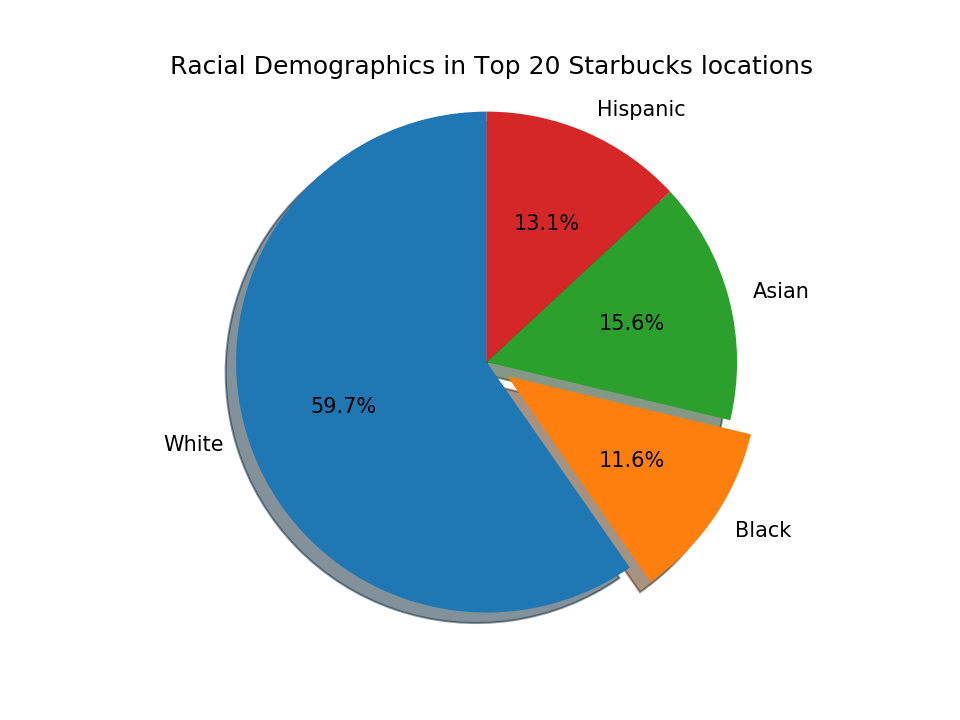

In [46]:
import matplotlib.pyplot as plt

#Pie chart for race demographics for Starbucks locations
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'White', 'Black', 'Asian', 'Hispanic'
sizes = [59.69, 11.59, 15.64, 13.09]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Racial Demographics in Top 20 Starbucks locations')

plt.show()




<IPython.core.display.Javascript object>


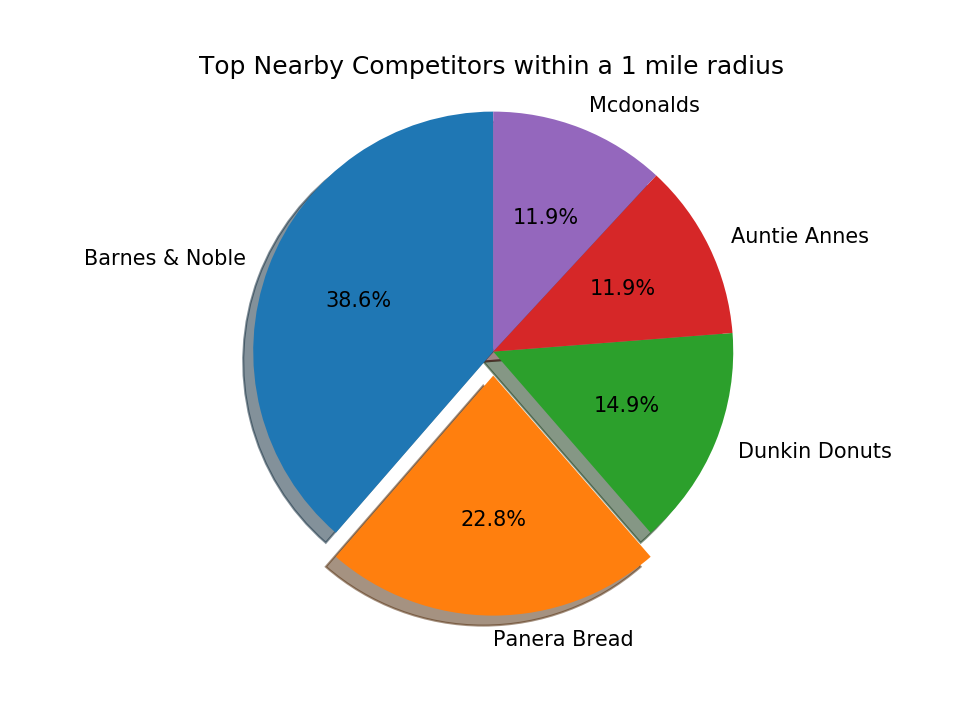

In [45]:
import matplotlib.pyplot as plt

#Pie chart for top Starbucks competitors within a one mile radius
labels = 'Barnes & Noble', 'Panera Bread', 'Dunkin Donuts', 'Auntie Annes','Mcdonalds'
sizes = [39, 23, 15, 12,12]
explode = (0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Top Nearby Competitors within a 1 mile radius')

plt.show()




